In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv(r"Visadataset.csv")
# Print shape of dataset
print(df.shape)

(25480, 12)


In [54]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

- we have seen in EDA that data don't have any null and duplicate value.

In [33]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


# Feature Engineering

## Feature Extraction

- Converting the year of establishment to age of company.

In [34]:
# importing date class from datetime module
from datetime import date
  
# creating the date object of today's date
todays_date = date.today()
current_year= todays_date.year

In [35]:
# Subtract current year with year of estab to get company's age
df['company_age']=current_year-df['yr_of_estab']

# dropping the year of estab column
df.drop('yr_of_estab', inplace=True, axis=1)

In [36]:
# dropping the case_id column as it's of no use
df.drop('case_id', inplace=True, axis=1)

In [37]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,19


In [38]:
df.shape

(25480, 11)

### Split the data

* **Split Dataframe to X and y**
* **variable X i.e, independent columns, and a variable y i.e, dependent column as the “Case_Status” column.**


## Feature Transformation

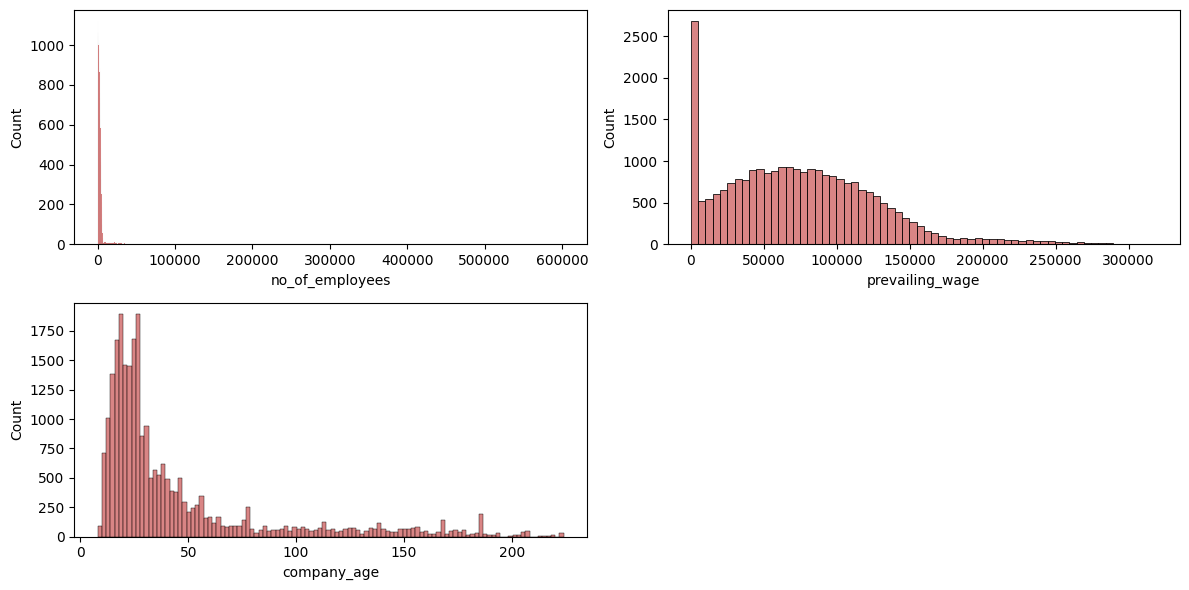

In [43]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=df[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

* No of employees and Copmany age column is skewed
* Apply a power transform featurewise to make data more Gaussian-like.

* Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

* Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

**Checking skewness**

**What is Skewness ?**

* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [40]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,19


In [41]:
# Check Skewness
df[['no_of_employees','prevailing_wage','company_age']].skew(axis=0, skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

In [42]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,19


- Positiviely Skewed : company_age, no_of_employees.
- Apply powerTransformer and then check the skewness.

### Creating Pipeline for Transformation

* PowerTransformer is to be applied on 'company_age' , 'no_of_employees' & 'prevailing_wage'.
* OrdinalEncoding is to be applied on 'has_job_experience','requires_job_training','full_time_position', &'education_of_employee'.
* OneHotEncoding is to be applied on 'continent','unit_of_wage', & 'region_of_employment'



In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

In [48]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['case_status']), df['case_status'],
                                                    test_size=0.2, random_state=42)

In [53]:
l1 = list(X_train.columns)
print(l1)

['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'no_of_employees', 'region_of_employment', 'prevailing_wage', 'unit_of_wage', 'full_time_position', 'company_age']


In [81]:
ord_col = ['has_job_experience','requires_job_training','full_time_position', 'education_of_employee']
oh_col = ['continent','unit_of_wage', 'region_of_employment']
pow_tran = ['company_age' , 'no_of_employees', 'prevailing_wage']
# creating pipeline
preprocess = ColumnTransformer([('ordinalencoding', OrdinalEncoder(), ord_col),
                                  ('onehotencoding', OneHotEncoder(), oh_col),
                                  ('powertransform',PowerTransformer('yeo-johnson'),pow_tran)],
                                   remainder='passthrough', verbose=True)
                            

In [82]:
X_train

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
2403,Asia,High School,Y,Y,1411,West,75107.37,Year,Y,15
6830,North America,Master's,Y,N,781,West,102403.56,Year,Y,12
878,Asia,High School,Y,N,958,South,89991.95,Year,Y,19
24061,Asia,Master's,N,N,900,West,128104.61,Year,Y,62
2109,Europe,High School,N,N,3533,West,12647.14,Year,Y,31
...,...,...,...,...,...,...,...,...,...,...
21575,North America,Master's,Y,N,4196,Midwest,110878.38,Year,N,14
5390,Asia,Master's,Y,N,1915,West,86111.13,Year,Y,11
860,Europe,Master's,N,N,2922,West,96192.58,Year,Y,23
15795,Asia,Master's,Y,N,6155,Northeast,98659.01,Year,Y,13


In [96]:
X_train1 = preprocess.fit_transform(X_train)

[ColumnTransformer]  (1 of 3) Processing ordinalencoding, total=   0.0s
[ColumnTransformer]  (2 of 3) Processing onehotencoding, total=   0.0s
[ColumnTransformer]  (3 of 3) Processing powertransform, total=   0.0s


In [97]:
X_train1.shape

(20384, 22)

In [99]:
feat_name = preprocess.get_feature_names_out()

In [100]:
res1 = pd.DataFrame(X_train1,columns=feat_name)
res1.head()

,ordinalencoding__has_job_experience,ordinalencoding__requires_job_training,ordinalencoding__full_time_position,ordinalencoding__education_of_employee,onehotencoding__continent_Africa,onehotencoding__continent_Asia,onehotencoding__continent_Europe,onehotencoding__continent_North America,onehotencoding__continent_Oceania,onehotencoding__continent_South America,onehotencoding__unit_of_wage_Hour,onehotencoding__unit_of_wage_Month,onehotencoding__unit_of_wage_Week,onehotencoding__unit_of_wage_Year,onehotencoding__region_of_employment_Island,onehotencoding__region_of_employment_Midwest,onehotencoding__region_of_employment_Northeast,onehotencoding__region_of_employment_South,onehotencoding__region_of_employment_West,powertransform__company_age,powertransform__no_of_employees,powertransform__prevailing_wage
0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.210750,-0.287853,0.206000
1,1.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.711772,-0.595299,0.629850
2,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.731691,-0.494550,0.444521
3,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.992959,-0.525937,0.983407
4,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.106058,0.296230,-1.229470


In [101]:
# Applying same transformation on X_test
X_test1 = preprocess.transform(X_test)

In [102]:
X_test1.shape

(5096, 22)

In [110]:
# Converting target column in ordinal encoding (Denied = 1, certified = 0)
y_train = np.where(y_train == 'Denied', 1, 0)
y_test = np.where(y_test == 'Denied', 1, 0)

- **Got Training data(X_train) & Testing Data(X_test) after transformation.**
- **Thus, data is ready and we can move with model building**

# Classification

In [104]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [105]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [106]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [111]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X_train, X_test, y_train, y_test, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [112]:
base_model_report =evaluate_models(X_train=X_train1, X_test=X_test1, y_train=y_train, y_test=y_test, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 0.9999
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.7288
- F1 score: 0.5430
- Precision: 0.6178
- Recall: 0.4844
- Roc Auc Score: 0.6675


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.6658
- F1 score: 0.4969
- Precision: 0.4976
- Recall: 0.4962
- Roc Auc Score: 0.6233


Gradient Boosting
Model performance for Training set
- Accuracy: 0.7530
- F1 score: 0.5795
- Precision: 0.6663
- Recall: 0.5126
- Roc Auc Score: 0.6925
----------------------------------
Model performance for Test set
- Accuracy: 0.7592
- F1 score: 0.5853
- Precision: 0.6851
- Recall: 0.5109
- Roc Auc Score: 0.6969


Logistic Regression
Model performance for Training 

In [113]:
base_model_report

,Model Name,Accuracy
2,Gradient Boosting,0.759223
6,CatBoosting Classifier,0.752159
7,Support Vector Classifier,0.747645
8,AdaBoost Classifier,0.740385
5,XGBClassifier,0.738422
0,Random Forest,0.728807
4,K-Neighbors Classifier,0.705848
3,Logistic Regression,0.704867
1,Decision Tree,0.665816


### HyperParameter Tuning

In [123]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,20,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

gb_prams = {
    "max_depth" : range(3,20,2),
    "n_estimators": [10, 50, 100, 200],
}

In [124]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params),
    ("GradientBoosting", GradientBoostingClassifier(), gb_prams)
    
]

**Create a function for model training and report which can be used in hyperparameter tuning loop**

In [125]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_train1, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.1s
[CV] END ....................max_depth=5, min_child_weight=1; total time=   0.1s
[CV] END ....................max_depth=5, min_child_weight=1; total time=   0.1s
[CV] END ....................max_depth=5, min_ch

In [126]:
model_param

{'XGBoost': {'min_child_weight': 3, 'max_depth': 3},
 'RF': {'n_estimators': 200, 'max_features': None, 'max_depth': 10},
 'KNN': {'weights': 'uniform', 'n_neighbors': 9, 'algorithm': 'auto'},
 'GradientBoosting': {'n_estimators': 50, 'max_depth': 3}}

In [127]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
    "Gradient Boosting Classifier": GradientBoostingClassifier(**model_param['GradientBoosting'])
}
tuned_report =evaluate_models(X_train=X_train1, X_test=X_test1, y_train=y_train, y_test=y_test, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 0.7826
- F1 score: 0.6330
- Precision: 0.7199
- Recall: 0.5648
- Roc Auc Score: 0.7278
----------------------------------
Model performance for Test set
- Accuracy: 0.7543
- F1 score: 0.5813
- Precision: 0.6710
- Recall: 0.5127
- Roc Auc Score: 0.6937


KNeighborsClassifier
Model performance for Training set
- Accuracy: 0.7678
- F1 score: 0.6028
- Precision: 0.6975
- Recall: 0.5308
- Roc Auc Score: 0.7082
----------------------------------
Model performance for Test set
- Accuracy: 0.7210
- F1 score: 0.5153
- Precision: 0.6102
- Recall: 0.4460
- Roc Auc Score: 0.6520


XGBClassifier
Model performance for Training set
- Accuracy: 0.7568
- F1 score: 0.5884
- Precision: 0.6713
- Recall: 0.5237
- Roc Auc Score: 0.6982
----------------------------------
Model performance for Test set
- Accuracy: 0.7533
- F1 score: 0.5809
- Precision: 0.6679
- Recall: 0.5139
- Roc Auc Score: 0.6933


Gradient Boosting Classifier
Model pe

In [128]:
tuned_report

,Model Name,Accuracy
0,Random Forest Classifier,0.754317
3,Gradient Boosting Classifier,0.753532
2,XGBClassifier,0.753336
1,KNeighborsClassifier,0.720958


In [132]:
best_model = RandomForestClassifier(**model_param['RF'])
best_model = best_model.fit(X_train1,y_train)
y_pred = best_model.predict(X_test1)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'RF'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'RF'
Accuracy Score value: 0.7522
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      3401
           1       0.66      0.52      0.58      1695

    accuracy                           0.75      5096
   macro avg       0.72      0.69      0.70      5096
weighted avg       0.74      0.75      0.74      5096



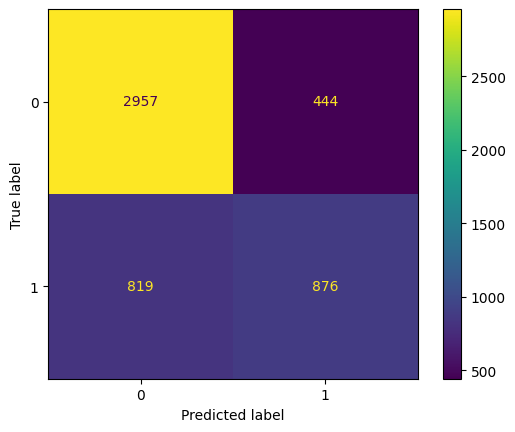

In [133]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test1, y_test)